Dora Alicia Guevara Villalpando  
Matrícula: 1551003 

**Procesamiento y Clasificación de Datos**

# Redes Neuronales Convolucionales (CNNs)

Las **Redes Neuronales Convolucionales (CNNs)** son un tipo de algoritmo de aprendizaje profundo ampliamente utilizado en tareas relacionadas con imágenes y datos estructurados.  


### 1. Definición y Propósito

Las CNNs son redes diseñadas principalmente para tareas de visión por computadora como el reconocimiento de imágenes, la detección de objetos y la segmentación de imágenes. 


### 2. Estructura General

Una CNN trabaja tomando una imagen como entrada, representada como una matriz de valores de píxeles, y pasa por varias capas clave para extraer características:

- **Capas de convolución:** Extraen características importantes, como bordes o texturas, aplicando filtros (kernels) sobre la imagen.  
- **Capas de pooling:** Reducen la dimensión de las características extraídas para optimizar el procesamiento.  
- **Capas completamente conectadas:** Usan las características extraídas para realizar tareas de clasificación o predicción.  


### 3. Funcionamiento de las Capas

- **Convolución:** Se utiliza una operación matemática que multiplica matrices (filtros y entradas) para generar mapas de características (feature maps), representando patrones específicos de la imagen.  
- **Strides:** Determinan el paso con el que el filtro se desliza sobre la imagen, influyendo en la resolución del mapa resultante.  
- **Padding:** Añade píxeles ficticios alrededor de la imagen para preservar dimensiones o evitar pérdida de información en los bordes.  
- **Pooling:** Selecciona valores máximos (max pooling) o promedio (average pooling) de regiones específicas para reducir la resolución.  


### 4. Entrenamiento y Aprendizaje

Las CNNs se entrenan usando un proceso iterativo:

- Inicialmente, los valores de los filtros son aleatorios.  
- A través de la retropropagación, los filtros se ajustan para minimizar la función de pérdida, permitiendo a la red aprender las características relevantes.

## **Código**

Para crear el código tenemos imágenes de gatos, perros y aves.



### 1. Separar las imágenes en train y test

In [6]:
import os
import shutil
import random

# Directorio raíz donde están las imágenes organizadas por clase
source_dir = "Imagenes de animales"        # Carpeta de origen 
target_dir = "dataset"                     # Carpeta de destino para organizar


# Porcentaje de imágenes para entrenamiento
train_split = 0.8  


# Crear las carpetas destino
classes = ['Aves', 'Gatos', 'Perros']  


for cls in classes:
    os.makedirs(os.path.join(target_dir, 'train', cls), exist_ok = True)
    os.makedirs(os.path.join(target_dir, 'test', cls), exist_ok = True)

    
# Mover imágenes a las carpetas

for cls in classes:
    # Listar todas las imágenes de la clase
    class_dir = os.path.join(source_dir, cls)
    images = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

    # Barajar las imágenes para aleatorizar la distribución
    random.shuffle(images)

    # Separar imágenes para entrenamiento y prueba
    train_size = int(len(images) * train_split)
    train_images = images[:train_size]
    test_images = images[train_size:]

    # Mover las imágenes de entrenamiento
    for img in train_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(target_dir, 'train', cls, img)
        shutil.copy(src_path, dest_path)

    # Mover las imágenes de prueba
    for img in test_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(target_dir, 'test', cls, img)
        shutil.copy(src_path, dest_path)

    print(f"\n Clase '{cls}': {len(train_images)} imágenes para entrenamiento, {len(test_images)} para prueba.")

print("\n Organización completa. Las imágenes están en la carpeta 'dataset'.")



 Clase 'Aves': 21 imágenes para entrenamiento, 6 para prueba.

 Clase 'Gatos': 9 imágenes para entrenamiento, 3 para prueba.

 Clase 'Perros': 11 imágenes para entrenamiento, 3 para prueba.

 Organización completa. Las imágenes están en la carpeta 'dataset'.


In [7]:
# Ruta
os.getcwd()


'/Users/alicevillalpando/Desktop/Maestría/4to Tetra/Procesamiento y Clasificación de Datos/Tareas/Tarea 5 Clasificación de imágenes'

### 2. Código para un modelo de CNN 

In [9]:
# pip install tensorflow matplotlib

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [11]:
# Función para verificar si las imágenes son válidas

def is_valid_image(file_path):
    try:
        img = Image.open(file_path)
        img.verify()  # Verifica si la imagen es válida
        return True
    except (IOError, SyntaxError):
        return False
    

In [12]:
# Verificar el conjunto de datos

def check_dataset_validity(directory):
    
    print(f"Verificando imágenes en: {directory}")
    invalid_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if not is_valid_image(file_path):
                invalid_files.append(file_path)
                print(f"Archivo no válido encontrado: {file_path}")
    if invalid_files:
        print(f"{len(invalid_files)} archivos no válidos encontrados.")
    else:
        print("Todas las imágenes son válidas. \n")
    return invalid_files


In [13]:
# Verificar las carpetas de entrenamiento y prueba

check_dataset_validity('dataset/train')
check_dataset_validity('dataset/test')


Verificando imágenes en: dataset/train
Todas las imágenes son válidas. 

Verificando imágenes en: dataset/test
Todas las imágenes son válidas. 



[]

In [14]:
# Generadores de datos

train_dir = "dataset/train"
test_dir = "dataset/test"


In [15]:
# Preprocesamiento de datos

train_datagen = ImageDataGenerator(
    rescale = 1.0/255,                 # Normalización
    rotation_range = 20,               # Rotaciones aleatorias
    width_shift_range = 0.2,           # Desplazamiento horizontal
    height_shift_range = 0.2,          # Desplazamiento vertical
    shear_range = 0.2,                 # Corte aleatorio
    zoom_range = 0.2,                  # Zoom aleatorio
    horizontal_flip = True,            # Volteo horizontal
    fill_mode = "nearest"              # Relleno de píxeles faltantes
)


In [16]:
# Normalización sin augmentación

test_datagen = ImageDataGenerator(rescale = 1.0/255) 


In [17]:
# Generadores de datos

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64, 64),           # Redimensiona imágenes a 64x64 píxeles
    batch_size = 16,                  # Tamaño del lote
    class_mode = 'categorical'        # Etiquetas categóricas (para varias clases)
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (64, 64),
    batch_size = 16,
    class_mode = 'categorical'
)


Found 53 images belonging to 3 classes.
Found 49 images belonging to 3 classes.


In [18]:
# Construcción del modelo CNN

model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64, 3)),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(3, activation = 'softmax')
])



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compilación del modelo

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)


In [20]:
# Entrenamiento del modelo

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

history = model.fit(
    train_generator,
    epochs = 100,
    validation_data = test_generator,
    callbacks = [early_stopping]
)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.4082 - loss: 1.1051

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step - accuracy: 0.4096 - loss: 1.1012 - val_accuracy: 0.5102 - val_loss: 1.0593
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - accuracy: 0.4838 - loss: 1.0982 - val_accuracy: 0.5102 - val_loss: 1.0476
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - accuracy: 0.3780 - loss: 1.0690 - val_accuracy: 0.5102 - val_loss: 1.0072
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step - accuracy: 0.5512 - loss: 1.0080 - val_accuracy: 0.5102 - val_loss: 0.9847
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step - accuracy: 0.4798 - loss: 0.9942 - val_accuracy: 0.5102 - val_loss: 1.0048
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - accuracy: 0.5707 - loss: 0.9353 - val_accuracy: 0.5102 - val_loss: 0.9634
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.4712 - loss: 1.0154 - val_accuracy: 0.5102 - val_loss: 0.8901
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 0.4784 - loss: 0.9558 - val_accuracy: 0.5102 - val_loss: 0.8

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - accuracy: 0.9239 - loss: 0.2595 - val_accuracy: 0.8438 - val_loss: 0.3139
Epoch 52/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.9089 - loss: 0.2638 - val_accuracy: 0.8438 - val_loss: 0.3117
Epoch 53/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - accuracy: 0.7912 - loss: 0.4062 - val_accuracy: 0.8750 - val_loss: 0.2098
Epoch 54/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.8096 - loss: 0.3889 - val_accuracy: 0.8750 - val_loss: 0.2490
Epoch 55/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.9044 - loss: 0.2646 - val_accuracy: 0.9375 - val_loss: 0.1744
Epoch 56/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - accuracy: 0.9268 - loss: 0.2168 - val_accuracy: 0.9062 - val_loss: 0.1968
Epoch 57/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - accuracy: 0.8574 - loss: 0.4020 - val_accuracy: 0.9688 - val_loss: 0.1301
Epoch 58/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.8831 - loss: 0.2904 - val_accuracy: 0.9062 - val_lo

In [21]:
# Evaluación del modelo

test_loss, test_acc = model.evaluate(test_generator)
print(f"Precisión en el conjunto de prueba: {test_acc:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8449 - loss: 0.2851 
Precisión en el conjunto de prueba: 0.86


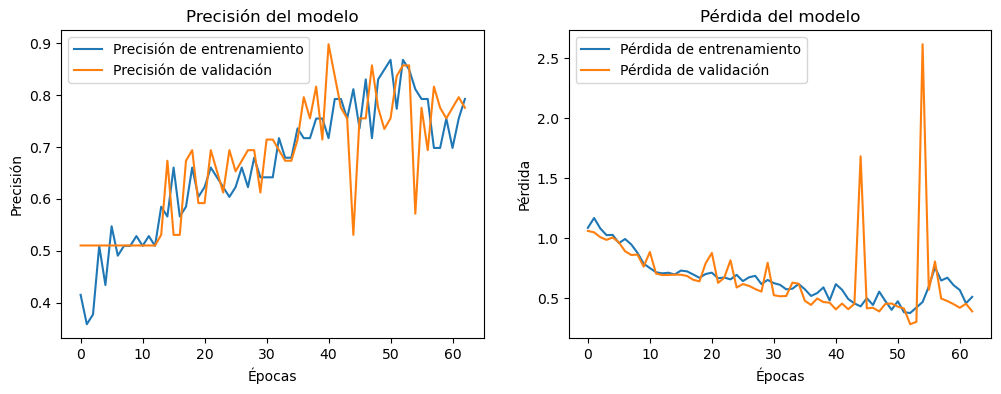

In [22]:
# Gráficos de precisión y pérdida

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label = 'Precisión de validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label = 'Pérdida de validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Guardar la imagen generada
output_path = "/Users/alicevillalpando/Desktop/Maestría/4to Tetra/Procesamiento y Clasificación de Datos/Tareas/Tarea 5 Clasificación de imágenes/imagenes_reporte/accuracy_loss_curve.png"
plt.savefig(output_path)

plt.show()


In [23]:
## Incluir Batch Normalization

from tensorflow.keras.layers import BatchNormalization

model_2 = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(3, activation = 'softmax')
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compilación del modelo

model_2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)


In [25]:
# Entrenamiento del modelo

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

history_2 = model_2.fit(
    train_generator,
    epochs = 100,
    validation_data = test_generator,
    callbacks = [early_stopping]
)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 461ms/step - accuracy: 0.5754 - loss: 2.9513 - val_accuracy: 0.3673 - val_loss: 1.1156
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step - accuracy: 0.5564 - loss: 4.6585 - val_accuracy: 0.4898 - val_loss: 0.9485
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.5741 - loss: 3.6154 - val_accuracy: 0.4898 - val_loss: 0.9615
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step - accuracy: 0.5564 - loss: 2.4346 - val_accuracy: 0.5714 - val_loss: 0.9540
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.5601 - loss: 2.5553 - val_accuracy: 0.6122 - val_loss: 0.9482
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.7456 - loss: 1.2181 - val_accuracy: 0.6735 - val_loss: 0.9479
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.7331 - loss: 1.4242 - val_accuracy: 0.5102 - val_loss: 1.0075
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step - accuracy: 0.6738 - loss: 1.2173 - val_accuracy: 0.5714 - v

In [26]:
# Evaluación del modelo

test_loss_2, test_acc_2 = model_2.evaluate(test_generator)
print(f"Precisión en el conjunto de prueba: {test_acc_2:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5786 - loss: 0.8968 
Precisión en el conjunto de prueba: 0.57


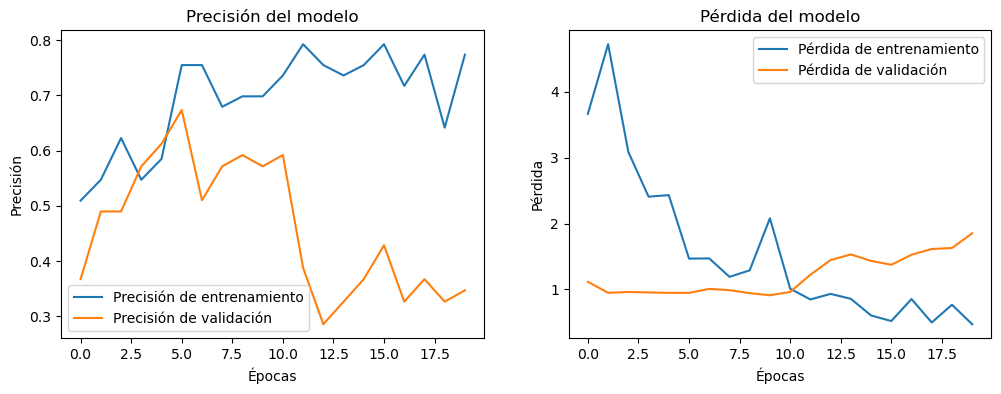

In [27]:
# Gráficos de precisión y pérdida con Batch Normalization

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label = 'Precisión de entrenamiento')
plt.plot(history_2.history['val_accuracy'], label = 'Precisión de validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label = 'Pérdida de entrenamiento')
plt.plot(history_2.history['val_loss'], label = 'Pérdida de validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


### 3. Predicción para una nueva imagen

In [29]:
# Nueva imagen

def predict_image(img_path):
    try:
        img = image.load_img(img_path, target_size=(64, 64))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)  # Añade dimensión batch
        prediction = model.predict(img_array)
        classes = list(train_generator.class_indices.keys())
        print(f"Predicción: {classes[np.argmax(prediction)]}")
        
    except Exception as e:
        print(f"Error al procesar la imagen: {img_path}, {e}")


In [67]:
# Ejemplo de predicción

img_pred = "Yuki.jpeg"

predict_image(img_pred) 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicción: Perros


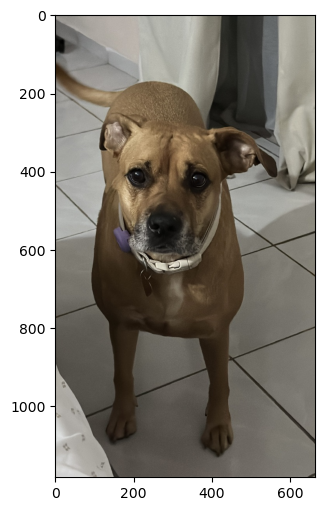

In [31]:
# mostrar imagen

import matplotlib.pyplot as pldt
import matplotlib.cbook as cbook

with cbook.get_sample_data(img_pred) as image_file:
    imagen = plt.imread(image_file)

fig, ax = plt.subplots(figsize = (8,6))
im = ax.imshow(imagen)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


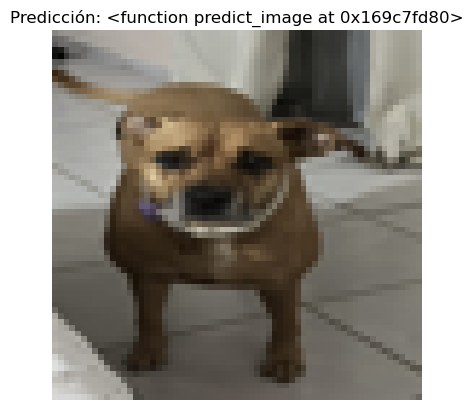

La imagen fue clasificada como: Perros


In [73]:
# Cargar una nueva imagen para predicción
new_img_path = "Yuki.jpeg"
new_img = Image.open(new_img_path)
new_img = new_img.resize((64, 64))
new_array = np.array(new_img) / 255.0
new_array = np.expand_dims(new_array, axis = 0)  # Expandir dimensión

# Realizar la predicción
prediction = model.predict(new_array)
predicted_class = np.argmax(prediction, axis = 1)[0]
class_labels = ['Aves', 'Gatos', 'Perros']
predicted_label = class_labels[predicted_class]

# Mostrar la predicción
plt.imshow(new_img)
plt.title(f"Predicción: {predict_image}")
plt.axis("off")

# Guardar la imagen generada
output_path = "/Users/alicevillalpando/Desktop/Maestría/4to Tetra/Procesamiento y Clasificación de Datos/Tareas/Tarea 5 Clasificación de imágenes/imagenes_reporte/prediction_example.png"
plt.savefig(output_path)

plt.show()

print(f"La imagen fue clasificada como: {predicted_label}")


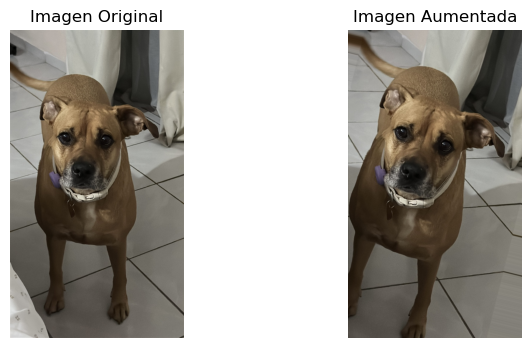

Imagen aumentada guardada en: /Users/alicevillalpando/Desktop/Maestría/4to Tetra/Procesamiento y Clasificación de Datos/Tareas/Tarea 5 Clasificación de imágenes/imagenes_reporte/augmented_example.png


In [32]:
# Cargar una imagen de ejemplo
img_path = "Yuki.jpeg"  
original_img = Image.open(img_path)
original_array = np.array(original_img) / 255.0  # Normalización

# Crear un generador de aumento de datos
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

# Aplicar el aumento de datos a la imagen
original_array = np.expand_dims(original_array, axis = 0)  # Expandir dimensión para el generador
augmented_iter = datagen.flow(original_array, batch_size = 1)

# Obtener una imagen aumentada
augmented_array = next(augmented_iter)[0]

# Mostrar imágenes
fig, axes = plt.subplots(1, 2, figsize = (8, 4))

# Imagen original
axes[0].imshow(original_img)
axes[0].set_title("Imagen Original")
axes[0].axis("off")

# Imagen aumentada
axes[1].imshow(augmented_array)
axes[1].set_title("Imagen Aumentada")
axes[1].axis("off")

# Guardar la imagen generada
output_path = "/Users/alicevillalpando/Desktop/Maestría/4to Tetra/Procesamiento y Clasificación de Datos/Tareas/Tarea 5 Clasificación de imágenes/imagenes_reporte/augmented_example.png"
plt.savefig(output_path)
plt.show()

print(f"Imagen aumentada guardada en: {output_path}")
